In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from scripts.load_data import load_data


In [19]:
#  correct file path
file_path = "../data/Common Data Warehouse-Orginal.xlsx"

xls = pd.ExcelFile(file_path)

xls.sheet_names



['Customer', 'Instrument', 'Financial', 'GL', 'Group GL']

In [20]:

customer_df = xls.parse("Customer")  # Contains Country, NACE, Sector Name
financial_df = xls.parse("Financial")  # Contains transaction Amounts

#  first few rows
print(customer_df.head())
print(financial_df.head())


     Customer ID Local Customer ID                Customer Name NACE Code L1  \
0  1000009735298        4339256379             YYT YQRWMZRTS ZT            G   
1  1000009736257        4343649237  FRXSTZDS KZNSZS TYNYLQX T V            G   
2  1000044667284         813518872           SZNDSLX HWLDXNG ZS            L   
3  1000007802416         992508949       ØSTYRDZLYN GWLFTZNY ZS            R   
4  1000007807925         994176307                   JYRRZDW ZS            L   

                         NACE Name L1  NACE Code  Bankrupcy Flag Rating Score  \
0          WHOLESALE AND RETAIL TRADE        NaN             NaN          NaN   
1          WHOLESALE AND RETAIL TRADE        NaN             NaN          NaN   
2              REAL ESTATE ACTIVITIES   682090.0             0.0          NaN   
3  ARTS, ENTERTAINMENT AND RECREATION   931100.0             0.0         PPE+   
4              REAL ESTATE ACTIVITIES   682090.0             0.0          NaN   

  Country  Customer Responsible 

In [21]:
# Merging financial transactions with customer information
merged_df = financial_df.merge(
    customer_df, left_on="Cust ID", right_on="Customer ID", how="left"
)

# Displaying the merged dataset
merged_df.head()


,Agmt ID,GL Acct ID,Source,Cust ID,Amount,Customer ID,Local Customer ID,Customer Name,NACE Code L1,NACE Name L1,NACE Code,Bankrupcy Flag,Rating Score,Country,Customer Responsible Unit,Sector Code,Sector Name
0,1000162418540,1000000008710,229|ADJ,1000007793706,0.00,1000007793706,990597391,HWTYLL LYXLXGHYTYR HWLDXNG ZS,L,REAL ESTATE ACTIVITIES,682090.0,0.0,NaN,NO,1.040420e+09,5.0,Non financial corporations
1,1000376865946,1000000013691,229,1000009653088,-5198.52,1000009653088,4216007625,NaN,A,"AGRICULTURE, FORESTRY AND FISHING",11100.0,0.0,PC0,DK,1.050002e+09,5.0,Non financial corporations
2,1000205191664,1000000008710,229|ADJ,1000044609208,0.00,1000044609208,997510461,FWRQS MZRKYRXNG HWLDXNG ZS,K,FINANCIAL AND INSURANCE ACTIVITIES,661900.0,0.0,PC4-,NO,1.040222e+09,5.0,Non financial corporations
3,1000329416423,1000000008710,229|ADJ,1000009657652,0.00,1000009657652,4333246983,STYNHØJ HWLDXNG Z/S,M,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",701010.0,0.0,PC4-,DK,1.050003e+09,5.0,Non financial corporations
4,1000239743539,1000000008710,229|ADJ,1000007699415,0.00,1000007699415,936370446,SYRVX ZS,G,WHOLESALE AND RETAIL TRADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Grouping by Country and calculate total assets
country_aggregated_df = merged_df.groupby("Country", as_index=False).agg(
    Total_Amount=("Amount", "sum")
)

# Displaying sorted results
country_aggregated_df.sort_values(by="Total_Amount", ascending=False)


,Country,Total_Amount
79,ZM,1.469315e+05
77,VG,4.418290e+03
1,AG,0.000000e+00
3,AR,0.000000e+00
60,PE,0.000000e+00
...,...,...
62,PL,-5.649457e+09
21,DK,-9.105355e+09
68,SE,-1.757045e+10
58,NO,-2.141329e+10


In [27]:
# Grouping by NACE Code, Sector Name, and Country to get total assets
nace_country_df = merged_df.groupby(["NACE Name L1", "Sector Name", "Country"]).agg(
    Total_Assets=("Amount", "sum")
).reset_index()

# Finding the country with the maximum assets per NACE code and sector category
max_assets_per_nace_sector = nace_country_df.loc[nace_country_df.groupby(["NACE Name L1", "Sector Name"])["Total_Assets"].idxmax()]

# result
max_assets_per_nace_sector


,NACE Name L1,Sector Name,Country,Total_Assets
0,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Households,NO,0.000000e+00
3,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non financial corporations,FI,-6.393408e+05
5,ACTIVITIES OF EXTRATERRITORIAL ORGANISATIONS A...,General governments,KE,-1.979729e+07
6,ACTIVITIES OF EXTRATERRITORIAL ORGANISATIONS A...,Households,PL,-2.988230e+04
10,ACTIVITIES OF EXTRATERRITORIAL ORGANISATIONS A...,Non financial corporations,NI,-6.452357e+05
12,ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES,Households,NO,-4.085196e+05
14,ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES,Non financial corporations,AE,0.000000e+00
31,ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES,Other financial corporations,FI,-5.000903e+06
34,"AGRICULTURE, FORESTRY AND FISHING",Households,NL,0.000000e+00
47,"AGRICULTURE, FORESTRY AND FISHING",Non financial corporations,GL,0.000000e+00


In [24]:
# Save data to Excel
country_aggregated_df.to_excel("../data/Country_Aggregated_Amounts.xlsx", index=False)
max_assets_per_nace_sector.to_excel("../data/Max_Assets_Per_NACE_Sector.xlsx", index=False)

print("Results saved successfully!")


Results saved successfully!


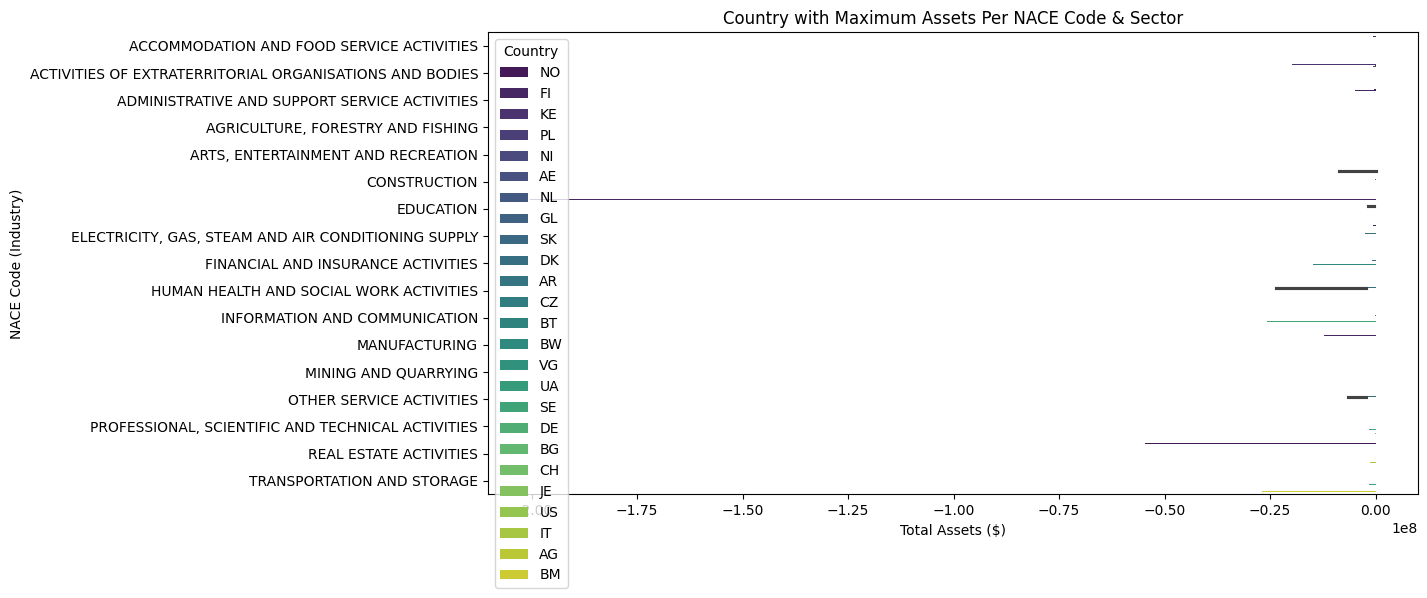

In [26]:
#  figure size
plt.figure(figsize=(12, 6))

sns.barplot(x="Total_Assets", y="NACE Name L1", hue="Country", data=max_assets_per_nace_sector, palette="viridis")

plt.xlabel("Total Assets ($)")
plt.ylabel("NACE Code (Industry)")
plt.title("Country with Maximum Assets Per NACE Code & Sector")
plt.legend(title="Country")
plt.show()


In [29]:
#showing all Results
# Group by NACE Code, Sector Name, and Country to get total assets
nace_country_df = merged_df.groupby(["NACE Name L1", "Sector Name", "Country"]).agg(
    Total_Assets=("Amount", "sum")
).reset_index()

# Show all data 
nace_country_df.sort_values(by=["NACE Name L1", "Sector Name", "Total_Assets"], ascending=[True, True, False])


,NACE Name L1,Sector Name,Country,Total_Assets
0,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Households,NO,0.000000e+00
3,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non financial corporations,FI,-6.393408e+05
2,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non financial corporations,DK,-4.357099e+06
1,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non financial corporations,BE,-9.005937e+07
4,ACCOMMODATION AND FOOD SERVICE ACTIVITIES,Non financial corporations,NO,-1.618608e+08
...,...,...,...,...
265,TRANSPORTATION AND STORAGE,Non financial corporations,LR,-7.412590e+08
256,TRANSPORTATION AND STORAGE,Non financial corporations,DK,-8.965082e+08
250,TRANSPORTATION AND STORAGE,Non financial corporations,BM,-1.105693e+09
270,TRANSPORTATION AND STORAGE,Non financial corporations,NO,-3.533248e+09
